In [160]:
import pandas as pd
import openpyxl
import statsmodels.api as sm
import matplotlib.pylab as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

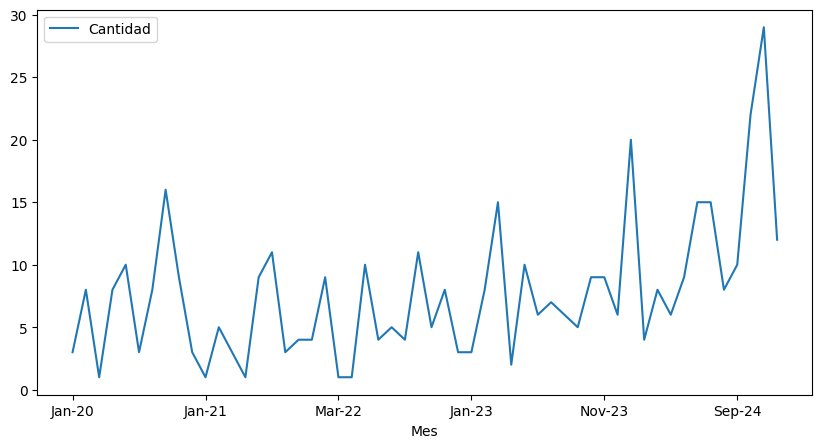

        Cantidad
Mes             
Jan-20         3
Feb-20         8
Mar-20         1
Jun-20         8
Jul-20        10
Aug-20         3
Sep-20         8
Oct-20        16
Nov-20         9
Dec-20         3
Jan-21         1
Feb-21         5
Mar-21         3
Apr-21         1
Jun-21         9
Jul-21        11
Sep-21         3
Oct-21         4
Jan-22         4
Feb-22         9
Mar-22         1
Apr-22         1
May-22        10
Jun-22         4
Jul-22         5
Aug-22         4
Sep-22        11
Oct-22         5
Nov-22         8
Dec-22         3
Jan-23         3
Feb-23         8
Mar-23        15
Apr-23         2
May-23        10
Jun-23         6
Jul-23         7
Aug-23         6
Sep-23         5
Oct-23         9
Nov-23         9
Dec-23         6
Jan-24        20
Feb-24         4
Mar-24         8
Apr-24         6
May-24         9
Jun-24        15
Jul-24        15
Aug-24         8
Sep-24        10
Oct-24        22
Nov-24        29
Dec-24        12


In [161]:
base_ventas = pd.read_excel(r"/home/serway_85/ventasParasoles (2) (2).xlsm",sheet_name='ventas',index_col='Mes')
#base_ventas = pd.read_excel(r"c:/Users/JORGE CONTRERAS/OneDrive - 900208659-2 DAMIS SAS/Escritorio/PLANEACION/consumos/INDICADORES PLANEACION/ventasParasoles (2) (2).xlsm",sheet_name='ventas',index_col='Mes')
#base_ventas['Mes']=base_ventas['Mes'].dt.strftime('%b-%y')
base_ventas_pergotek=base_ventas[(base_ventas['Familia']=='PERGOTEK') & (base_ventas['Tipo Factu']== 'PRODUCTO TERMINADO')]
total_nulos=base_ventas_pergotek.isnull().sum()
total_nulos

base_ventas

base_ventas.reset_index(inplace=True)
base_ventas['Mes'] = pd.to_datetime(base_ventas['Mes'], errors='coerce')

base_ventas.reset_index(inplace=True)
#base_ventas['Mes'] = pd.to_datetime(base_ventas['Mes'], errors='coerce')
#base_ventas['Mes'] = base_ventas['Mes'].dt.strftime('%b-%y')
base_ventas.set_index('Mes', inplace=True)
base_analisis=base_ventas[base_ventas['Familia']=='PERGOLITE']

base_analisis=base_analisis.groupby(['Mes'])['Cantidad'].sum().reset_index()
base_analisis = base_analisis.sort_values('Mes')
base_analisis['Mes'] = base_analisis['Mes'].dt.strftime('%b-%y')
base_analisis.set_index('Mes',inplace=True)

base_analisis_hot = base_analisis.copy()

ventas=base_analisis['Cantidad']
base_analisis.plot(y='Cantidad',kind='line',figsize=(10,5))
plt.show()


print(base_analisis)



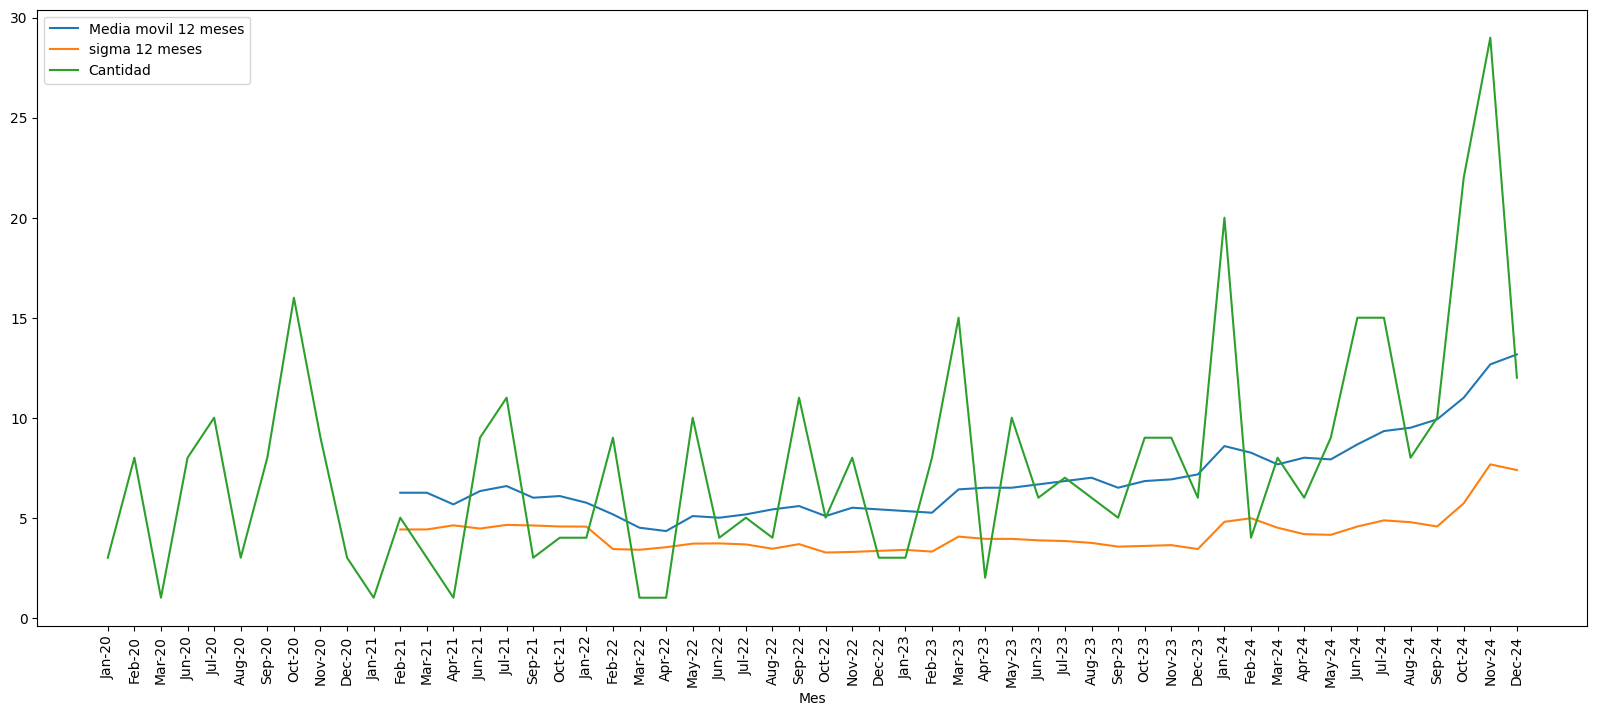

In [162]:
serietiempo = base_analisis['Cantidad']
type(serietiempo)
plt.figure(figsize=(20,8))
serietiempo.rolling(12).mean().plot(label= 'Media movil 12 meses')
serietiempo.rolling(12).std().plot(label= 'sigma 12 meses')
serietiempo.plot()
plt.xticks(rotation=90)  # Rotar los meses para que sean legibles
plt.xticks(ticks=range(len(base_analisis.index)), labels=base_analisis.index) 

plt.legend()


In [4]:
#prueba de dickey-fuller aumentada

In [163]:
from statsmodels.tsa.stattools import adfuller

In [164]:
resultado = adfuller(base_analisis['Cantidad'])

resultado


(np.float64(2.2033768970693495),
 np.float64(0.9988852720544243),
 9,
 44,
 {'1%': np.float64(-3.5885733964124715),
  '5%': np.float64(-2.929885661157025),
  '10%': np.float64(-2.6031845661157025)},
 np.float64(258.6654344071105))

<Axes: xlabel='Mes'>

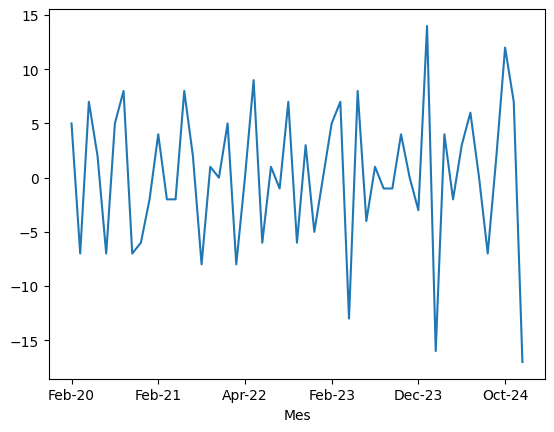

In [165]:
#diferenciacion
base_analisis['Primera diferencia'] = base_analisis['Cantidad'] - base_analisis['Cantidad'].shift(1)

datos_diff = base_analisis['Cantidad'].diff().dropna()
datos_diff.plot()

In [166]:
adfuller(base_analisis['Primera diferencia'].dropna())

(np.float64(-5.7705010611042615),
 np.float64(5.406383693239676e-07),
 3,
 49,
 {'1%': np.float64(-3.5714715250448363),
  '5%': np.float64(-2.922629480573571),
  '10%': np.float64(-2.5993358475635153)},
 np.float64(255.54236763366714))

In [167]:
base_analisis['Segunda diferencia'] = base_analisis['Primera diferencia'] - base_analisis['Primera diferencia'].shift(1)
datos_diff2 = datos_diff.diff().dropna()

<Axes: xlabel='Mes'>

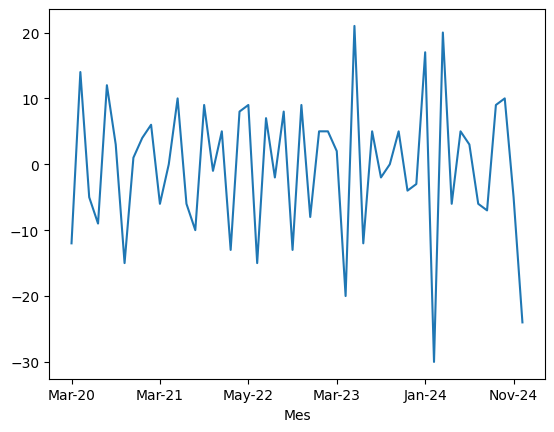

In [168]:
datos_diff2.plot()

In [169]:
adfuller(base_analisis['Segunda diferencia'].dropna())
#adfuller(datos_diff2.dropna())

(np.float64(-5.432222079818992),
 np.float64(2.8974569902411476e-06),
 11,
 40,
 {'1%': np.float64(-3.6055648906249997),
  '5%': np.float64(-2.937069375),
  '10%': np.float64(-2.606985625)},
 np.float64(248.0891646687125))

In [170]:
#diferencia con estacionalidad
base_analisis['Diferencia Estacionalidad'] = base_analisis['Cantidad'] - base_analisis['Cantidad'].shift(12)

<Axes: xlabel='Mes'>

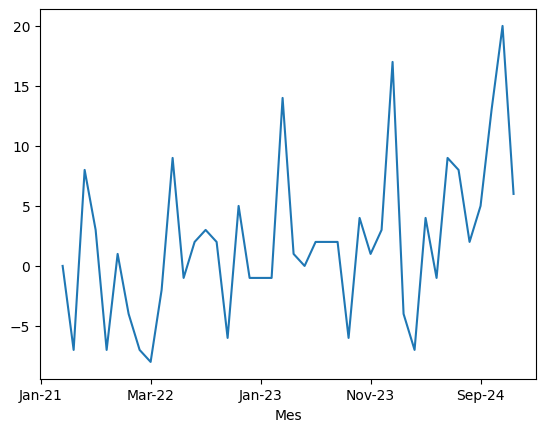

In [171]:
base_analisis['Diferencia Estacionalidad'].plot()

In [172]:
adfuller(base_analisis['Diferencia Estacionalidad'].dropna())

(np.float64(-5.178022682158115),
 np.float64(9.747347002974384e-06),
 0,
 41,
 {'1%': np.float64(-3.60098336718852),
  '5%': np.float64(-2.9351348158036012),
  '10%': np.float64(-2.6059629803688282)},
 np.float64(204.91229990773218))

In [173]:
base_analisis['Primera Diferencia Estacionalidad'] = base_analisis['Primera diferencia'] - base_analisis['Primera diferencia'].shift(12)
#datos_diff_est= datos_diff.diff(12).dropna()


<Axes: xlabel='Mes'>

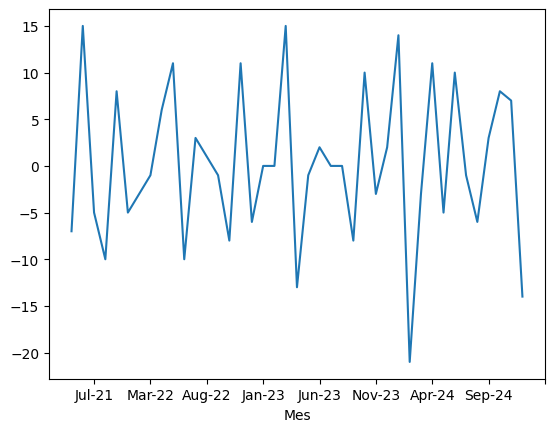

In [174]:
base_analisis['Primera Diferencia Estacionalidad'].plot()
#datos_diff_est.plot()
#datos_diff_est

In [175]:
adfuller(base_analisis['Primera Diferencia Estacionalidad'].dropna())

(np.float64(-3.6032595203252757),
 np.float64(0.005699017607083626),
 9,
 31,
 {'1%': np.float64(-3.661428725118324),
  '5%': np.float64(-2.960525341210433),
  '10%': np.float64(-2.6193188033298647)},
 np.float64(201.47394963659335))

PARTIR LA BASE

<Axes: xlabel='Mes'>

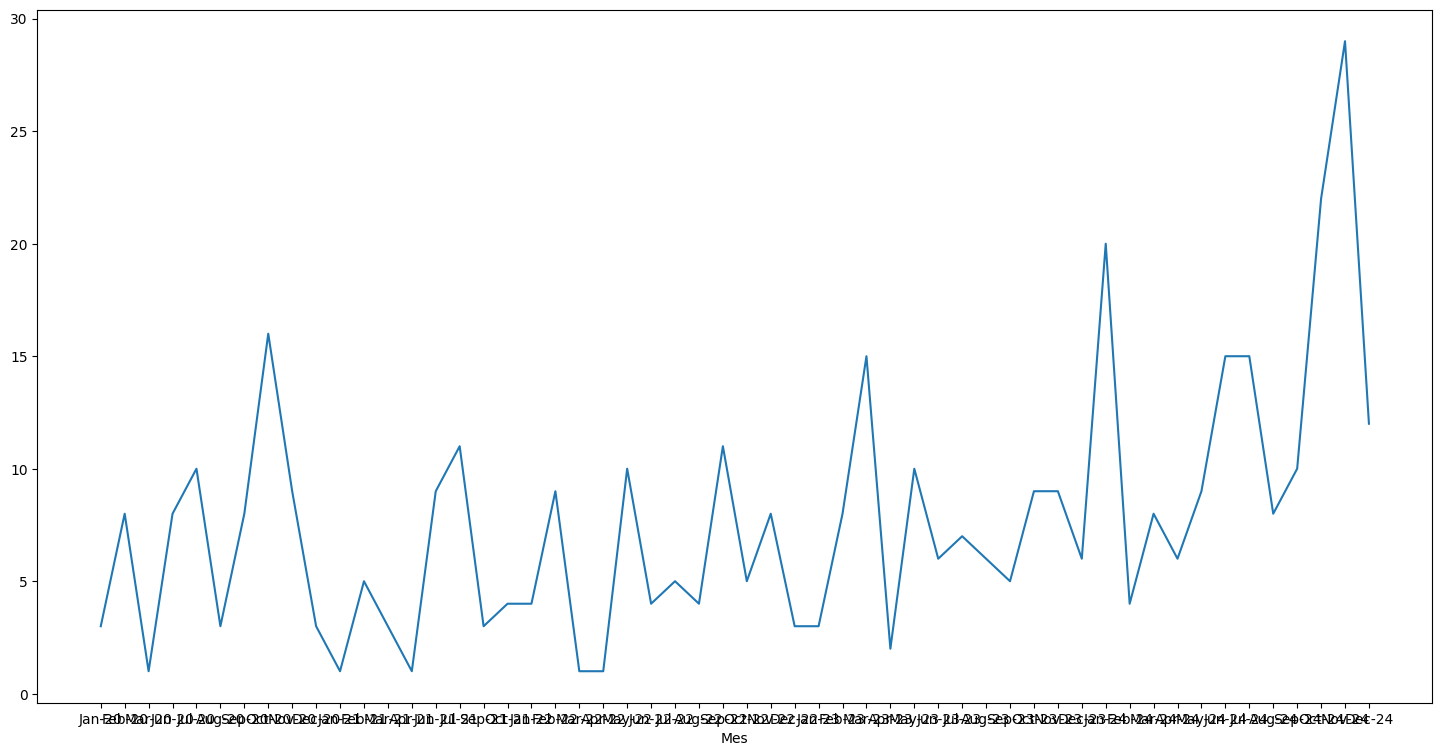

In [288]:
#partir la base en entrenamiento y prueba
plt.figure(figsize=(18,9))
plt.xticks(rotation=90)  # Rotar los meses para que sean legibles
plt.xticks(ticks=range(len(base_analisis.index)), labels=base_analisis.index) 
base_analisis['Cantidad'].plot()

ACF Y PACF PARA LA DIFERENCIA ESTACIONAL

In [239]:
train_size= int(len(base_analisis)*0.8)
train, test = base_analisis['Cantidad'][:train_size], base_analisis['Cantidad'][train_size:]

print(f"Entrenamiento: {len(train)} observaciones")
print(f"Prueba: {len(test)} observaciones")



BaseA = base_analisis[0:43
                      ]
BaseB = base_analisis[43:]
BaseB

Entrenamiento: 43 observaciones
Prueba: 11 observaciones


,Cantidad,Primera diferencia,Segunda diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Mes,,,,,
Feb-24,4,-16.0,-30.0,-4.0,-21.0
Mar-24,8,4.0,20.0,-7.0,-3.0
Apr-24,6,-2.0,-6.0,4.0,11.0
May-24,9,3.0,5.0,-1.0,-5.0
Jun-24,15,6.0,3.0,9.0,10.0
Jul-24,15,0.0,-6.0,8.0,-1.0
Aug-24,8,-7.0,-7.0,2.0,-6.0
Sep-24,10,2.0,9.0,5.0,3.0
Oct-24,22,12.0,10.0,13.0,8.0


COMPONENTES ACF Y PACF

In [214]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

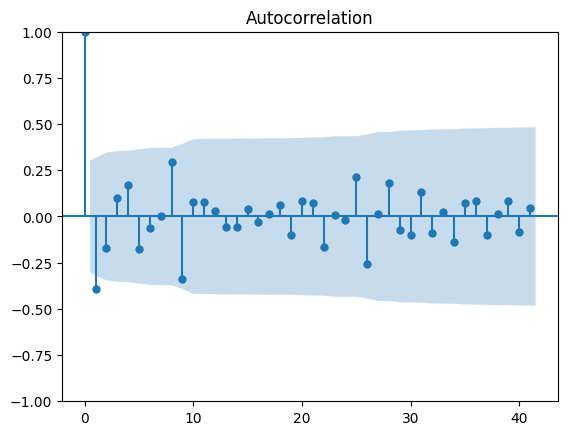

In [215]:
acf=plot_acf(BaseA['Primera diferencia'].dropna(), lags=41)





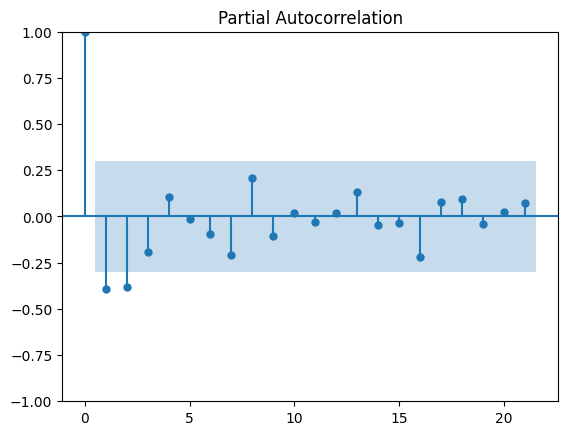

In [217]:
pacf=plot_pacf(BaseA['Primera diferencia'].dropna(), lags=21)

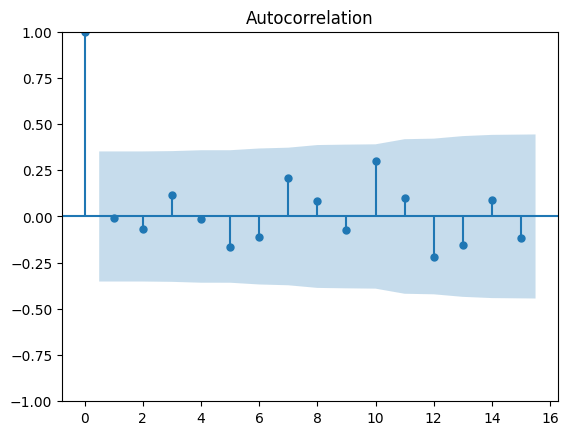

In [218]:
acf1=plot_acf(BaseA['Diferencia Estacionalidad'].dropna(), lags=15)


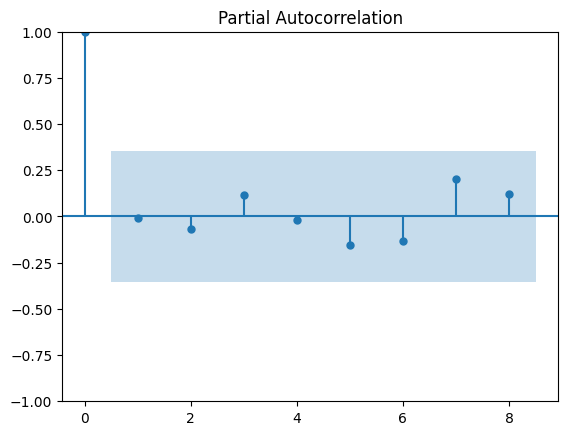

In [219]:
pacf1=plot_pacf(BaseA['Diferencia Estacionalidad'].dropna(), lags=8)


In [220]:
from statsmodels.tsa.arima_model import  ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [337]:
BaseA.index = pd.date_range(start='2020-01-01', periods=len(BaseA), freq='MS')
#Base_Entrenamiento=BaseA.copy()
#Base_Entrenamiento['Cantidad_normalizada']=scaler.fit_transform(Base_Entrenamiento[['Cantidad']])
modelo = sm.tsa.statespace.SARIMAX(BaseA['Cantidad'],order=(2,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,
    enforce_invertibility=False)



In [338]:
resultados = modelo.fit()

In [339]:
print(resultados.summary())

                                      SARIMAX Results                                      
Dep. Variable:                            Cantidad   No. Observations:                   43
Model:             SARIMAX(2, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -50.000
Date:                             Fri, 21 Feb 2025   AIC                            109.999
Time:                                     11:24:38   BIC                            113.862
Sample:                                 01-01-2020   HQIC                           110.197
                                      - 07-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1318      1.304     -0.101      0.919      -2.688       2.424
ar.L2          0.2019      

<Axes: >

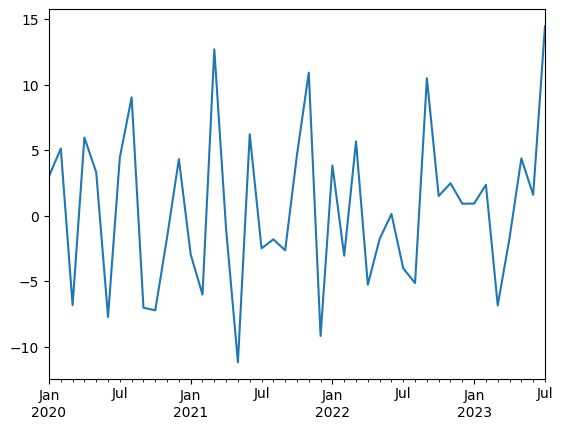

In [340]:
residuos = resultados.resid


residuos
residuos.plot()

/tmp/ipykernel_2896/2973395324.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  acf2.show()


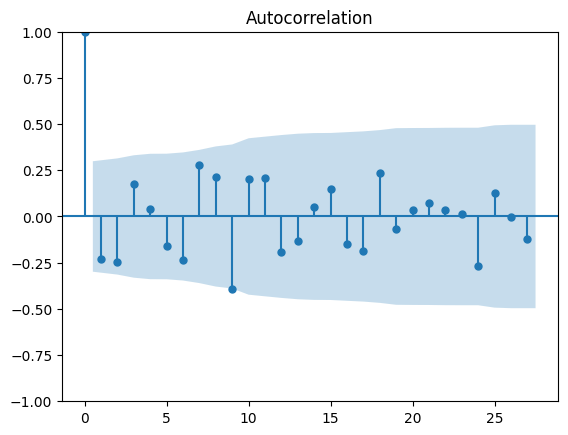

In [341]:
acf2=plot_acf(residuos, lags=27)
acf2.show()

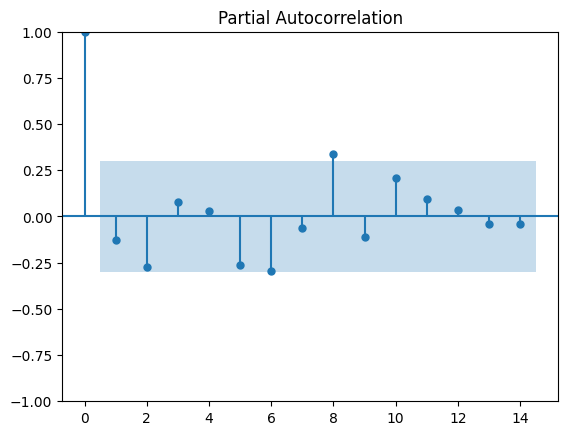

In [321]:
acf2=plot_pacf(residuos, lags=14)

In [322]:
BaseB

,Cantidad,Primera diferencia,Segunda diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Mes,,,,,
Feb-24,4,-16.0,-30.0,-4.0,-21.0
Mar-24,8,4.0,20.0,-7.0,-3.0
Apr-24,6,-2.0,-6.0,4.0,11.0
May-24,9,3.0,5.0,-1.0,-5.0
Jun-24,15,6.0,3.0,9.0,10.0
Jul-24,15,0.0,-6.0,8.0,-1.0
Aug-24,8,-7.0,-7.0,2.0,-6.0
Sep-24,10,2.0,9.0,5.0,3.0
Oct-24,22,12.0,10.0,13.0,8.0


In [323]:
BaseA['Pronostico'] =resultados.predict()
BaseA

/tmp/ipykernel_2896/4139444989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BaseA['Pronostico'] =resultados.predict()


,Cantidad,Primera diferencia,Segunda diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad,Pronostico
2020-01-01,3,NaN,NaN,NaN,NaN,0.000000
2020-02-01,8,5.0,NaN,NaN,NaN,3.000000
2020-03-01,1,-7.0,-12.0,NaN,NaN,7.999963
2020-04-01,8,7.0,14.0,NaN,NaN,1.000052
2020-05-01,10,2.0,-5.0,NaN,NaN,7.999948
2020-06-01,3,-7.0,-9.0,NaN,NaN,9.999985
2020-07-01,8,5.0,12.0,NaN,NaN,3.000052
2020-08-01,16,8.0,3.0,NaN,NaN,7.999963
2020-09-01,9,-7.0,-15.0,NaN,NaN,15.999940
2020-10-01,3,-6.0,1.0,NaN,NaN,9.000052


<Axes: >

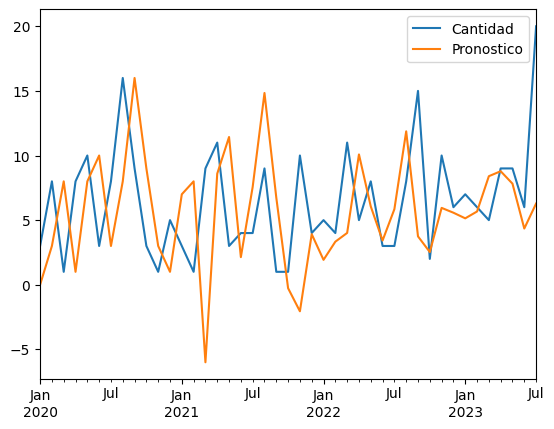

In [324]:
BaseA[['Cantidad','Pronostico']].plot()

Agregar filas con fechas futuras

In [325]:
from pandas.tseries.offsets import DateOffset

In [326]:
fechasfuturas= [BaseA.index[-1]+ DateOffset(months=x) for x in range(1,11)]

In [311]:
fechasfuturas

[Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-09-01 00:00:00'),
 Timestamp('2023-10-01 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2024-02-01 00:00:00'),
 Timestamp('2024-03-01 00:00:00'),
 Timestamp('2024-04-01 00:00:00'),
 Timestamp('2024-05-01 00:00:00')]

In [327]:
df_futura_pro =pd.DataFrame(index=fechasfuturas)


In [328]:
df_futura_pro

""
2023-08-01
2023-09-01
2023-10-01
2023-11-01
2023-12-01
2024-01-01
2024-02-01
2024-03-01
2024-04-01
2024-05-01


In [329]:
df_futura_pro = pd.DataFrame(index=fechasfuturas,columns=BaseA.columns)
df_futura_pro

#nuevabase[['Cantidad','Pronostico']].plot()

,Cantidad,Primera diferencia,Segunda diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad,Pronostico
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
df_futura_pro_new=pd.concat([BaseA,df_futura_pro])
df_futura_pro_new

/tmp/ipykernel_2896/2566586945.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_futura_pro_new=pd.concat([BaseA,df_futura_pro])


,Cantidad,Primera diferencia,Segunda diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad,Pronostico
2020-01-01,3,NaN,NaN,NaN,NaN,0.000000
2020-02-01,8,5.0,NaN,NaN,NaN,3.000000
2020-03-01,1,-7.0,-12.0,NaN,NaN,7.999963
2020-04-01,8,7.0,14.0,NaN,NaN,1.000052
2020-05-01,10,2.0,-5.0,NaN,NaN,7.999948
2020-06-01,3,-7.0,-9.0,NaN,NaN,9.999985
2020-07-01,8,5.0,12.0,NaN,NaN,3.000052
2020-08-01,16,8.0,3.0,NaN,NaN,7.999963
2020-09-01,9,-7.0,-15.0,NaN,NaN,15.999940
2020-10-01,3,-6.0,1.0,NaN,NaN,9.000052


<Axes: >

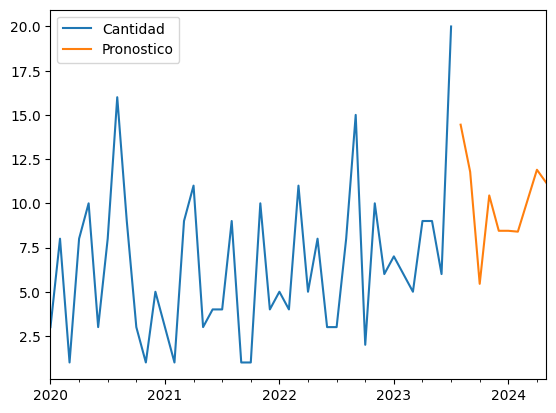

In [331]:


df_futura_pro_new['Pronostico']=resultados.predict(start=43, end=54)
df_futura_pro_new[['Cantidad','Pronostico']].plot()



RMSE


DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', freq='MS')


/tmp/ipykernel_2896/4053892970.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_futuras = pd.date_range(start=BaseA.index[-1] + pd.DateOffset(months=1),


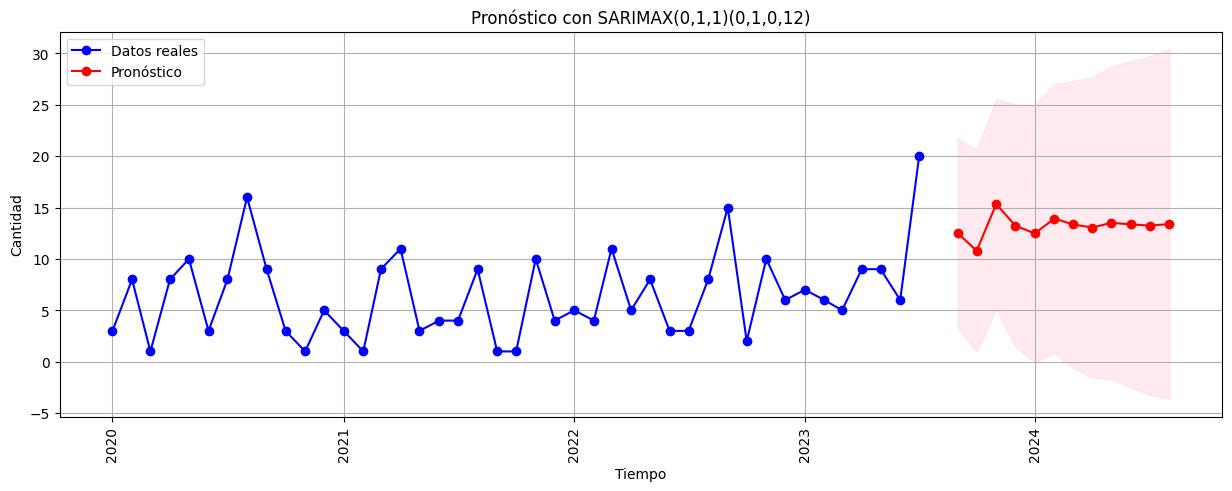

        Fecha  Pronóstico  Límite Inferior  Límite Superior
0  2023-08-31   12.510179         3.294780        21.725578
1  2023-09-30   10.792552         0.979170        20.605934
2  2023-10-31   15.340584         5.129830        25.551338
3  2023-11-30   13.250618         1.473222        25.028014
4  2023-12-31   12.475075        -0.026059        24.976209
5  2024-01-31   13.931974         0.852210        27.011738
6  2024-02-29   13.366548        -0.580128        27.313224
7  2024-03-31   13.052141        -1.563130        27.667411
8  2024-04-30   13.512599        -1.696818        28.722016
9  2024-05-31   13.365897        -2.503374        29.235168
10 2024-06-30   13.246239        -3.221823        29.714301
11 2024-07-31   13.389850        -3.639042        30.418743


In [ ]:
print(BaseA.index)


# 1️⃣ Crear el modelo SARIMAX
modelo_final = sm.tsa.statespace.SARIMAX(BaseA['Cantidad'],
                                         order=(2,1,0), 
                                         seasonal_order=(1,1,1,12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

resultado = modelo_final.fit()

# 2️⃣ Hacer predicciones para los próximos 12 meses
periodos_prediccion = 12
predicciones = resultado.get_forecast(steps=periodos_prediccion)
intervalo_confianza = predicciones.conf_int()

# 3️⃣ Generar las fechas futuras para el eje X
BaseA.index = pd.to_datetime(BaseA.index, format='%b-%y')

if pd.isnull(BaseA.index[-1]):
    print("Error: Última fecha en BaseA no es válida")
else:
    fechas_futuras = pd.date_range(start=BaseA.index[-1] + pd.DateOffset(months=1), 
                                   periods=periodos_prediccion, freq='M')

# 4️⃣ Graficar los resultados
plt.figure(figsize=(15,5))
plt.plot(BaseA.index, BaseA['Cantidad'], label='Datos reales', color='blue', marker='o')
plt.plot(fechas_futuras, predicciones.predicted_mean, label='Pronóstico', color='red', marker='o')

# 5️⃣ Agregar etiquetas de valores en los puntos de pronóstico
# Asegurar que predicciones tengan las fechas correctas
predicciones_df = pd.DataFrame({'Prediccion': predicciones.predicted_mean}, index=fechas_futuras)

for i, (fecha, txt) in enumerate(predicciones_df.itertuples()):
    plt.annotate(f"{txt:.1f}", (fecha, txt), 
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='red')


# 6️⃣ Agregar banda de intervalo de confianza
plt.fill_between(fechas_futuras, 
                 intervalo_confianza.iloc[:, 0], 
                 intervalo_confianza.iloc[:, 1], 
                 color='pink', alpha=0.3)

# 7️⃣ Personalizar la visualización
plt.xticks(rotation=90)  # Rotar etiquetas del eje X
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.title('Pronóstico con SARIMAX(0,1,1)(0,1,0,12)')
plt.legend()
plt.grid()

# 8️⃣ Mostrar la gráfica
plt.show()

tabla_pronostico = pd.DataFrame({
    'Fecha': fechas_futuras,  # Fechas futuras
    'Pronóstico': predicciones.predicted_mean.values,  # Valores pronosticados
    'Límite Inferior': intervalo_confianza.iloc[:, 0].values,  # Intervalo inferior
    'Límite Superior': intervalo_confianza.iloc[:, 1].values   # Intervalo superior
})

# Mostrar la tabla en pantalla
print(tabla_pronostico)

# Opcional: Guardar la tabla en un archivo CSV
tabla_pronostico.to_excel('pro.xlsx', index=False)


In [32]:
base_analisis_hot.to_excel('base.xlsx')

HOT WINTERS

In [262]:
train =BaseA[:43]
test_a= BaseB[28:]
BaseB


,Cantidad,Primera diferencia,Segunda diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Mes,,,,,
Feb-24,4,-16.0,-30.0,-4.0,-21.0
Mar-24,8,4.0,20.0,-7.0,-3.0
Apr-24,6,-2.0,-6.0,4.0,11.0
May-24,9,3.0,5.0,-1.0,-5.0
Jun-24,15,6.0,3.0,9.0,10.0
Jul-24,15,0.0,-6.0,8.0,-1.0
Aug-24,8,-7.0,-7.0,2.0,-6.0
Sep-24,10,2.0,9.0,5.0,3.0
Oct-24,22,12.0,10.0,13.0,8.0


/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


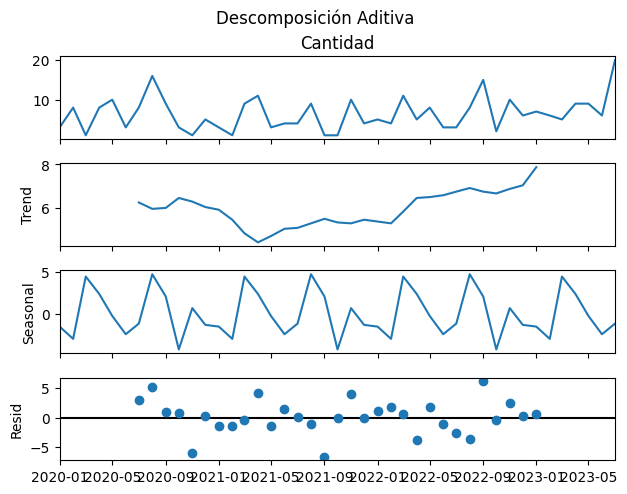

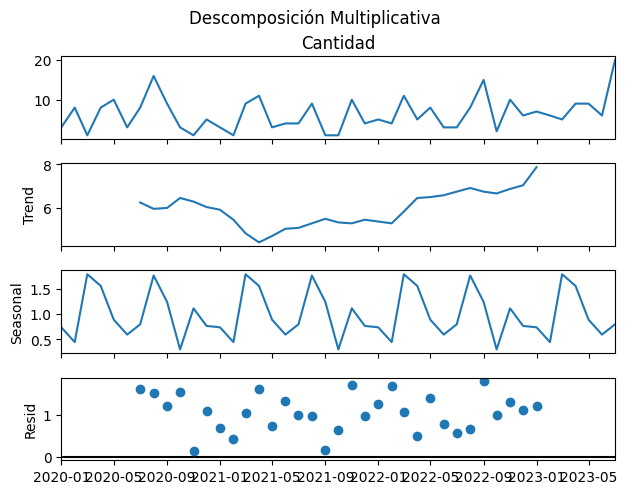

In [263]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
# Suponiendo que tu data es mensual con posible estacionalidad de 12 meses
model = ExponentialSmoothing(
    BaseA['Cantidad'], 
    trend='mul',          # tendencia aditiva
    seasonal='mul',       # estacionalidad aditiva
    seasonal_periods=12   # 12 meses
)
fit = model.fit()

n_test = len(BaseB['Cantidad'])
hw_forecast = fit.forecast(steps=n_test)
hw_forecast

# 1. Descomposición aditiva
result_add = seasonal_decompose(BaseA['Cantidad'], model='additive', period=12)
fig_add = result_add.plot()
fig_add.suptitle('Descomposición Aditiva', y=1.02)
plt.show()

# 2. Descomposición multiplicativa
result_mul = seasonal_decompose(BaseA['Cantidad'], model='multiplicative', period=12)
fig_mul = result_mul.plot()
fig_mul.suptitle('Descomposición Multiplicativa', y=1.02)
plt.show()





In [264]:
df_comparation = pd.DataFrame({
    'Real': BaseB['Cantidad'],
    'Pronostico': hw_forecast
})


df_comparation

,Real,Pronostico
2023-08-01 00:00:00,NaN,21.496216
2023-09-01 00:00:00,NaN,17.898862
2023-10-01 00:00:00,NaN,1.259126
2023-11-01 00:00:00,NaN,11.110606
2023-12-01 00:00:00,NaN,9.082242
2024-01-01 00:00:00,NaN,5.944675
2024-02-01 00:00:00,NaN,8.344795
2024-03-01 00:00:00,NaN,10.157290
2024-04-01 00:00:00,NaN,15.441902
2024-05-01 00:00:00,NaN,14.739205


In [265]:
print(fit.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Cantidad   No. Observations:                   43
Model:             ExponentialSmoothing   SSE                            474.292
Optimized:                         True   AIC                            135.227
Trend:                   Multiplicative   BIC                            163.406
Seasonal:                Multiplicative   AICC                           163.727
Seasonal Periods:                    12   Date:                 Fri, 21 Feb 2025
Box-Cox:                          False   Time:                         10:58:29
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0928749                alpha                 True
smoothing_trend          

In [145]:
predictions = fit.forecast(steps=len(test))


/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/serway_85/proyecto_pronstico/pronostico_damis/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(BaseB['Cantidad'], predictions)
mse = mean_squared_error(BaseB['Cantidad'], predictions)
rmse = mse**0.5

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 6.7500452659142
RMSE: 8.877706057712343
